# Titanic: Machine Learning from Disaster 

Business Problem: The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

** What we want to do: **
We want to complete the analysis of what sorts of people were likely to survive. Using machine learning to predict which passengers survived the tragedy. 

# Step 1: Importing the data

In [400]:
# import some useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [401]:
train = pd.read_csv('/Users/Jiaqi/Documents/Data Science/Kaggle/Titanic/train.csv')
test = pd.read_csv('/Users/Jiaqi/Documents/Data Science/Kaggle/Titanic/test.csv')

In [402]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [403]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


From .info() we can see there are some categorical columns in both the train and test set. For categorical columns, we usually change it to numberical values. We should change them both in train and test set. We can combine training and test set together for data cleaning. 

In [404]:
# combine train and test together 
full = train.append(test, ignore_index=True)

# train set has 891 rows. so we can define the first 891 rows from the full dataset as train set
train_df = full[:891]

In [405]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 83.6+ KB


# Step 2: Exploratory Data Analysis

Exploring the training set to: 
1. Understand the data, such as relationships among variables
2. Check if there are missing data. If so, deal with missing data
3. Data processing, such as converting categorical variables to numerical variables

In [406]:
# check the head of the training dataset
train_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


VARIABLE DESCRIPTIONS:

- Survived: Survived (1) or died (0) - numeric
- Pclass: Passenger's class - numeric
- Name: Passenger's name - categorical
- Sex: Passenger's sex - categorical
- Age: Passenger's age - numeric
- SibSp: Number of siblings/spouses aboard - numeric
- Parch: Number of parents/children aboard - numeric
- Ticket: Ticket number - numeric + alphabetical
- Fare: Fare - numeric
- Cabin: Cabin - number + char
- Embarked: Port of embarkation - categorical


In [407]:
# check describe
train_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


Note that Age has 714 counts, but there are 891 rows in the training set. There are some missing values for Age. We should keep this in mind and think of way to deal with missing Age. 

In [408]:
# we can also use describe to check for categorical columns 
train_df.describe(include = ['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,204,889,891,891,891
unique,147,3,891,2,681
top,C23 C25 C27,S,"Kantor, Mr. Sinai",male,CA. 2343
freq,4,644,1,577,7


In [409]:
# another way to check which column have missing value
train_df.isnull().any()

# we can see Age, Cabin and Embarked have missing value

Age             True
Cabin           True
Embarked        True
Fare           False
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived       False
Ticket         False
dtype: bool

In [410]:
# check full dataset missing value
full.isnull().any()

Age             True
Cabin           True
Embarked        True
Fare            True
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
dtype: bool

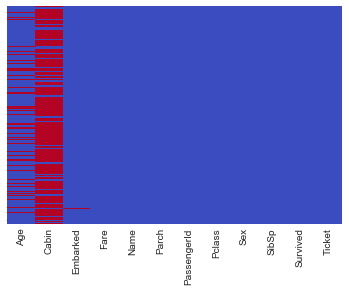

In [411]:
# we can also use heatmap to see which columns have missing data
sns.heatmap(data=train_df.isnull(),yticklabels=False,cbar = False,cmap = 'coolwarm')

# a quick heatmap also shows that Age and Cabin are the top two with missing values

From the above analysis, we see that:
- Age: there are 714 counts, that's 714/891 = 80% about 80% of valid values. For the 20% missing value, we can probably use some computational, such as mean to repleace the missing value
- Cabin: there are 204 counts, that's 204/891 = 23% valid data. There are almost 80% missing value, that too many missing values. We probably can drop this column. 
- Embarked: there are 889 counts, that's 889 / 891 = 99.7% of completed data. For the missing ones, we can probably use the most frequent Embarked code to replace them. 

Text(0.5,1,'Training Set Correlation')

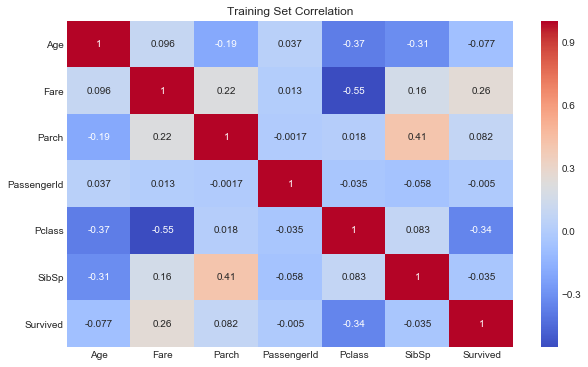

In [412]:
# check the correlation among all variables to try to find out which variables are more important
plt.figure(figsize=(10,6))
sns.heatmap(data=train_df.corr(),annot=True, cmap = 'coolwarm')
plt.title('Training Set Correlation')

# Step 3: Further explore the variables and survivial relationshop by Graphs

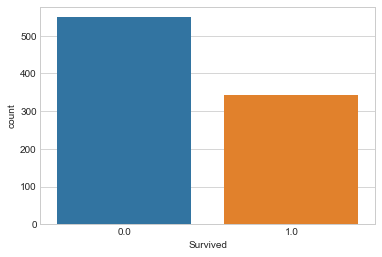

In [413]:
# see distribution of survival 
sns.set_style('whitegrid')
sns.countplot(x = train_df['Survived'])

In [414]:
# check how many people survived
print('Number of Survival: ',
    train_df['Survived'][train_df['Survived'] == 1].count())

# check how many people died
print('Number of death: ', train_df['Survived'][train_df['Survived'] == 0].count())


Number of Survival:  342
Number of death:  549


In [415]:
train_df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

Overall, we know there are 342 people survived, 549 people died in the training set. Survival Rate is about 38.38%

** Explore Age vs. Survival **

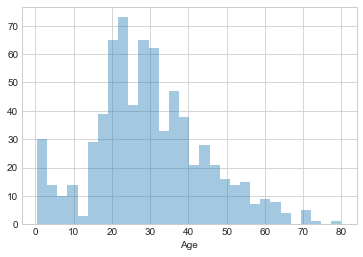

In [416]:
# age distribution 
sns.set_style('whitegrid')
sns.distplot(train_df['Age'].dropna(), bins = 30,kde=False)

Majority of people on board were between 15 to 40 something 

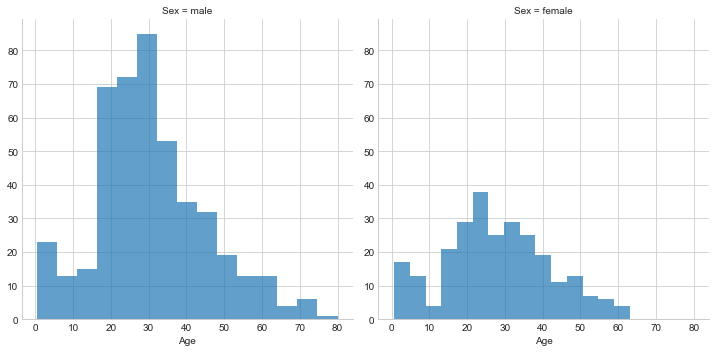

In [417]:
# check the age distribution by gender
g = sns.FacetGrid(train_df, col="Sex", size = 5)
g = (g.map(plt.hist,"Age", bins = 15, alpha=.7).add_legend())

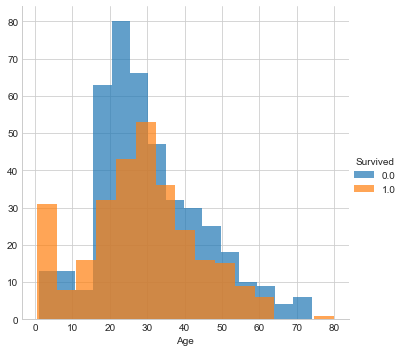

In [418]:
# Age vs. Survived
g = sns.FacetGrid(train_df, hue = 'Survived', size = 5)
g = (g.map(plt.hist,"Age", bins = 15, alpha=.7).add_legend())

We can see two things here: 
1. People who were below 5 years old had higher survival rate. People between 15 to 20 also had higher survival rate. 
2. The oldest person, about 80 years old survived. 

Age is a good feature to predict survival rate

** Explore Gender vs. Survival **

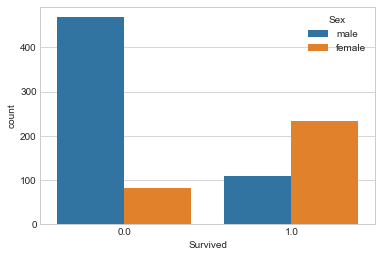

In [419]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_df, hue = 'Sex')

# this graph clearly shows that female has higher survival rate than male

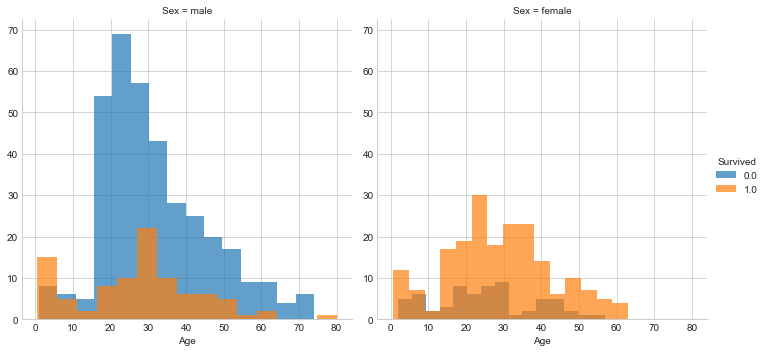

In [420]:
# Age vs. Survived, seperate by gender
g = sns.FacetGrid(train_df, col="Sex",hue = 'Survived', size = 5)
g = (g.map(plt.hist,"Age", bins = 15, alpha=.7).add_legend())

We can see that the survival rate for male is much lower than the survival rate for female. Gender will be one important feature to predict survival. 

We can also see that when age is below 5 years old, both gender have a high survival rate. Also, young female, from 15 to 40, have high surival rate. Age will be a good feature to predict survival too. 

** Explore other numeric variable **
1. Fare vs. Survived


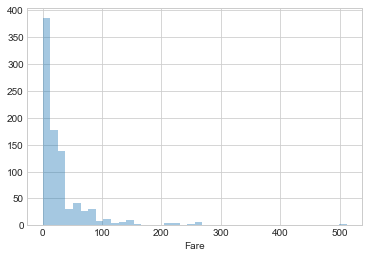

In [421]:
# check Fare distribution
sns.distplot(train_df['Fare'], bins = 40, kde=False)

Majority of the Fare onboard is less than 100. 

Question: what's the survival rate in turns of fare? Check out the following graph.

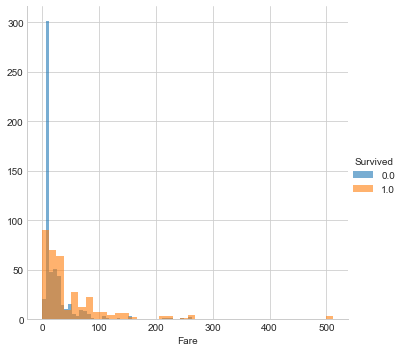

In [422]:
g = sns.FacetGrid(data = train_df, hue = 'Survived', size = 5)
g = g.map(plt.hist, 'Fare', bins = 40, alpha = 0.6).add_legend()

If we just looking at Fare, we see number of survival is greater than number of death in each fare range, with only one expection for fare around 20 something. 

What if we add gender?

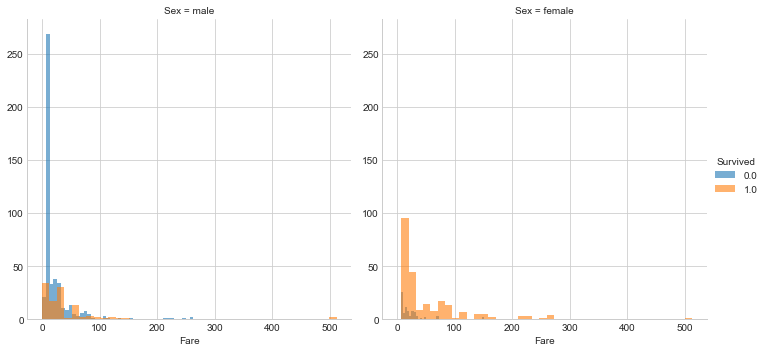

In [423]:
g = sns.FacetGrid(data = train_df, hue = 'Survived', col = 'Sex', size = 5)
g = g.map(plt.hist, "Fare", bins = 40, alpha = 0.6).add_legend()

We can see that for male, lower fare, lower survival rate. The highest fare male around 500 dollars survived. 

Fare is associated with survival.

** Explore other variables **
1. Pclass
2. SibSp
3. Parch
4. Embarked


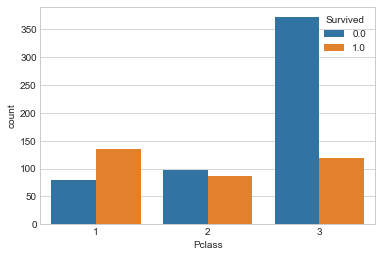

In [424]:
# Pclass
sns.countplot(x = 'Pclass', data = train_df, hue = 'Survived')

We see that Pclass 1 has higher survival rate and Pclass 3 has the lowest survival rate. 

Pclass is a good feature to predict survival

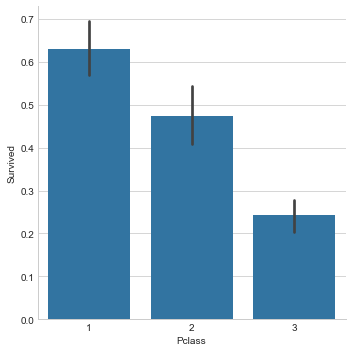

In [425]:
g = sns.FacetGrid(train_df, size = 5)
g.map(sns.barplot ,'Pclass' ,'Survived' )

This barplot also shows that Pclass = 1 has the highest survival rate. 

Pclass is a good feature to predict survival

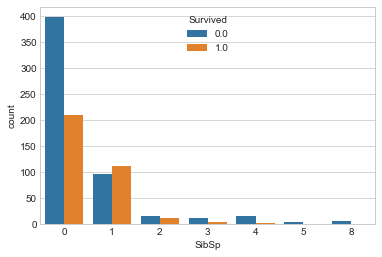

In [426]:
# SibSp
sns.countplot(x = 'SibSp',hue = 'Survived', data = train_df)

We can see: 
1. SibSp = 1 has the highest survival rate. 
2. SibSp = 3 or higher have the lower survival rate
3. SibSp = 5 or 6 have zero survival rate

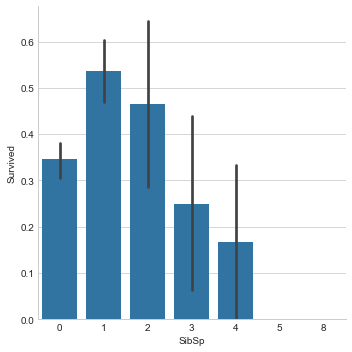

In [427]:
g = sns.FacetGrid(train_df, size = 5)
g = g.map(sns.barplot,'SibSp', 'Survived')

The aboved graph also shows that: 
1. SibSp = 1 has the highest survival rate, while SibSp = 5 or SibSp = 6 has zero survival rate
2. SibSP also a feature to predict survival

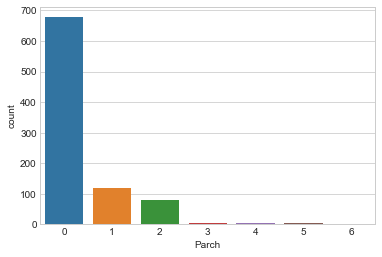

In [428]:
#Parch
sns.countplot(x = 'Parch',data=train_df)

Majority of people have no parent or children. That's Parch = 0

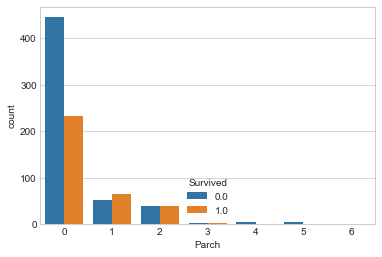

In [429]:
sns.countplot(x='Parch', data=train_df, hue = 'Survived')

1. When Parch = 1, survival rate is higher. 
2. Parch > 4, such as 4, 5 and 6, the survival rate is zero

Parch is also an indicator we can use to predict survival

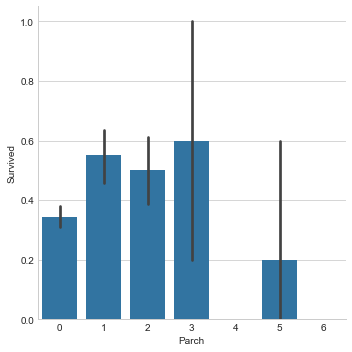

In [430]:
g = sns.FacetGrid(train_df, size = 5)
g = g.map(sns.barplot,'Parch','Survived')

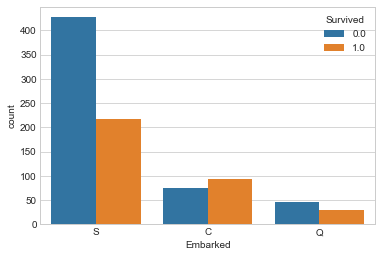

In [431]:
# Embarked
sns.countplot(x='Embarked',hue = 'Survived', data=train_df)

Many people were in Embarked = S, but Embarked = S has lower survival rate. 
Looks like Embarked = C has higher survival rate

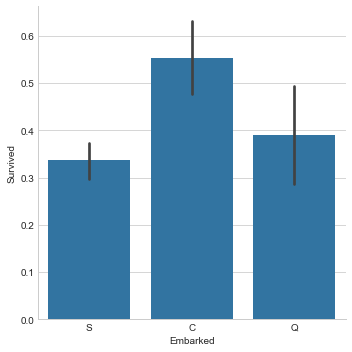

In [432]:
g = sns.FacetGrid(train_df, size = 5)
g = g.map(sns.barplot,'Embarked', 'Survived')

Barplot also shows that Embarked = C has the highest survival rate, then Embarked = Q. Embarked = S has the lowest survival rate. 

After considering these graphs, I think all the variables aboved have some sort of relation to survival. I will include them all. 


# Step 4: Data Cleaning

In [433]:
# recall which columns have missing values
full.isnull().any()

Age             True
Cabin           True
Embarked        True
Fare            True
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
dtype: bool

In [434]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [435]:
full['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

There are four columns have missing values: 
1. Age: about 1046/1309 = 80% complete. We can calculate the mean to replace missing values
2. Cabin: about 295/1309 = 22.5% complete. We don't have enough information to replace the missing values. We will drop this variable
3. Embarked: about 1307/1309 = 99.9% complete. We can use the most frequent embarked code to replace the missing values. 
4. Fare: about 13/8/1309 = 99.9% complete. We can use the average fare to replace the missing value. 

** Data Cleaning for Age **

We can simply use the average mean age to replace all the missing values. However, since different class has different surival rate, and maybe the mean age in different class were different. We can use the mean age in the training set in each class to replace the missing value in that class

In [436]:
# calculate mean age in the training set in each class
train_df['Age'].groupby(train_df['Pclass']).mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

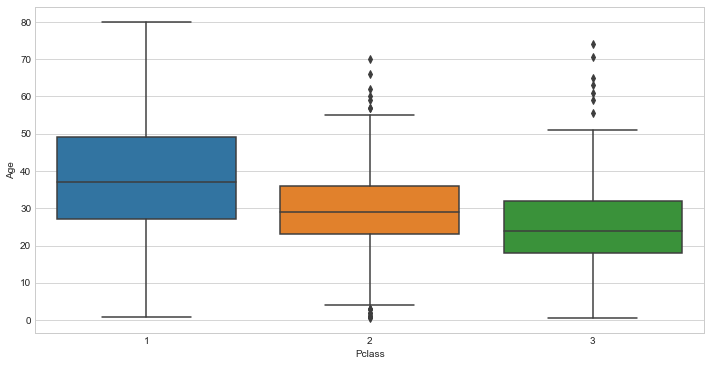

In [437]:
# check if differnet Pclass has different mean age
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age',data=train_df)

In [438]:
# create an empty list to hold mean age in each class
mean_age = []

for i in range(1,4): 
    mean_age.append(train_df['Age'][train_df['Pclass'] == i].mean())

In [439]:
# check the mean_age
mean_age

[38.233440860215055, 29.87763005780347, 25.14061971830986]

In [440]:
# assign mean age to the missing value in each class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1: 
            return mean_age[0]
        if Pclass == 2: 
            return mean_age[1]
        if Pclass == 3:
            return mean_age[2]
    else:
        return Age

In [441]:
full['Age'] = full[['Age','Pclass']].apply(impute_age,axis = 1)

In [442]:
# check if Age still has missing value
full['Age'].isnull().any()

False

In [443]:
# Reassign train_df
train_df = full[:891]

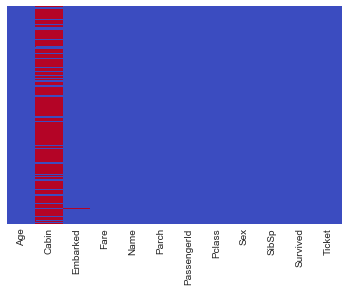

In [444]:
# check heatmap to see if Age missing value is gone
sns.heatmap(data=train_df.isnull(),yticklabels=False,cbar = False,cmap = 'coolwarm')

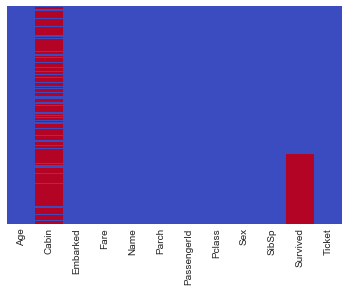

In [445]:
sns.heatmap(data=full.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm')

Yes! We don't see missing value for Age in both train_df and full dataset 

** Data Cleaning for Cabin ** 

Since there are too many missing values for Cabin. We will drop Cabin from our model

In [446]:
# drop cabin in the whole dataset
full.drop('Cabin',axis = 1, inplace = True)

# reset train_df
train_df = full[:891]

In [447]:
# check if cabin is dropped from full dataset
full.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


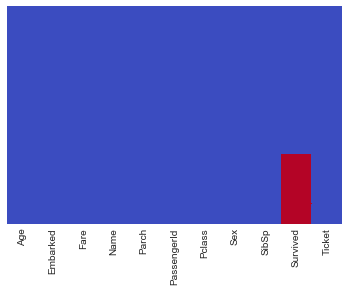

In [448]:
sns.heatmap(data=full.isnull(),yticklabels=False,cbar = False, cmap = 'coolwarm')

# we can see that cabin is now not in the full set

In [449]:
# check if cabin is dropped from train_df
train_df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


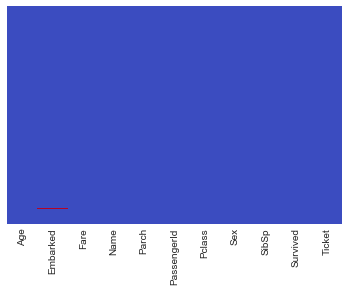

In [450]:
sns.heatmap(data=train_df.isnull(),yticklabels=False, cbar=False, cmap = 'coolwarm')

** Data Cleaning for Embarked ** 

We can use the most frequent embarked code to replace the missing values.

In [451]:
# get the most frequent of embarked
embarked_most = train_df['Embarked'].describe()[2]

# or we can do this: 
# embarked_most = train_df['Embarked'].value_counts().index[0]

In [452]:
# fill missing embarked with the most common category
full['Embarked'] = full['Embarked'].fillna(embarked_most)

In [453]:
# check if there are missing value for Embarked
full['Embarked'].isnull().any()

False

In [454]:
# assign train_df
train_df = full[:891]

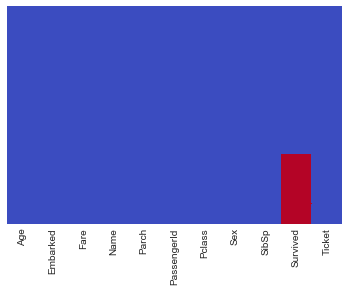

In [455]:
# plot heatmap to check if there are missing value for embarked
sns.heatmap(full.isnull(), yticklabels=False, cbar = False, cmap = 'coolwarm')

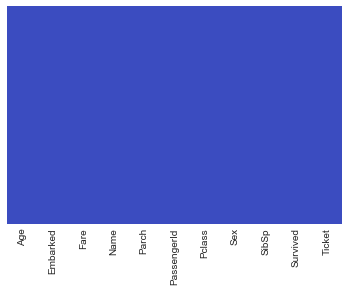

In [456]:
sns.heatmap(train_df.isnull(),yticklabels=False, cbar = False, cmap = 'coolwarm')

Yes! Embarked missing value is now taken care.

** Data Cleaning for Fare **

- Fare maybe relate to Pclass. Higher class lead to higher fare. So we should use the mean Fare in the corresponding class to replace the missing value
- There is no missing value in training set, but there is one missing value in the test set
- calculate the average fare in each class in the training set, then assign it to the missing value in the corresponding class in the test set. 

In [457]:
train_df['Fare'].groupby(train_df['Pclass']).mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

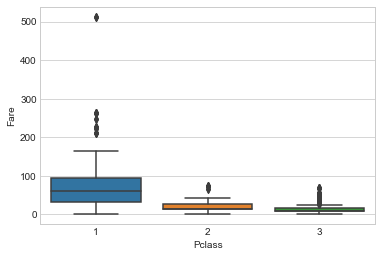

In [458]:
sns.boxplot(x='Pclass',y='Fare',data=train_df)

From above analysis, we confirm that different class has different average fare. We will replace the missing fare value in the test set based on the class it's in

In [459]:
# create a list to hold the average fare for each class
fare_mean = []
for i in range(1,4):
    fare_mean.append(train_df['Fare'][train_df['Pclass'] == i].mean())

In [460]:
fare_mean

[84.15468749999992, 20.66218315217391, 13.675550101832997]

In [461]:
# define a function to impute fare based on Pclass
def imputed_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        if Pclass == 1:
            return fare_mean[0]
        if Pclass == 2: 
            return fare_mean[1]
        if Pclass == 3:
            return fare_mean[2]
    else:
        return Fare
            

In [462]:
full['Fare'] = full[['Fare','Pclass']].apply(imputed_fare,axis=1)

In [463]:
# check if there are any missing value in Full again
full.isnull().any()

Age            False
Embarked       False
Fare           False
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
dtype: bool

In [464]:
# assign train_df
train_df = full[:891]

In [465]:
train_df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# Step 5: Converting Categorical Features

The variables *Embarked, Pclass and Sex * are treated as categorical variables. Some of our model algorithms can only handle numeric values and so we need to create a new variable (dummy variable) for every unique value of the categorical variables.

In [466]:
sex = pd.get_dummies(full['Sex'],drop_first=True)
embarked = pd.get_dummies(full['Embarked'],drop_first=True)
pclass = pd.get_dummies(full['Pclass'],drop_first = True)

In [467]:
# onces the columns changed to numeric values, we can drop the original and append the new ones
full.drop(['Sex','Embarked','Pclass'],axis = 1, inplace = True)

In [468]:
# add back the new columns
full = pd.concat([full,sex,embarked,pclass],axis = 1)

In [469]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
male           1309 non-null uint8
Q              1309 non-null uint8
S              1309 non-null uint8
2              1309 non-null uint8
3              1309 non-null uint8
dtypes: float64(3), int64(3), object(2), uint8(5)
memory usage: 88.3+ KB


In [470]:
# assign train_df
train_df = full[:891]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Age            891 non-null float64
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
dtypes: float64(3), int64(3), object(2), uint8(5)
memory usage: 60.1+ KB


In [471]:
train_df.head()

,Age,Fare,Name,Parch,PassengerId,SibSp,Survived,Ticket,male,Q,S,2,3
0,22.0,7.2500,"Braund, Mr. Owen Harris",0,1,1,0.0,A/5 21171,1,0,1,0,1
1,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1.0,PC 17599,0,0,0,0,0
2,26.0,7.9250,"Heikkinen, Miss. Laina",0,3,0,1.0,STON/O2. 3101282,0,0,1,0,1
3,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1.0,113803,0,0,1,0,0
4,35.0,8.0500,"Allen, Mr. William Henry",0,5,0,0.0,373450,1,0,1,0,1


# Step 6: Feature Engineering – Creating new variables

From the info(), we see that Name and Ticket are still strings. When we take a further look in Name, we can see the titles, such as Mr. Miss, etc. Maybe title is associated with gender and social stauts. And it may be helpful to predict survival.

* Credit to : https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html

In [472]:
# extrac title from each name
# do a test for one name first
test = train_df['Name'][0]
test

'Braund, Mr. Owen Harris'

In [473]:
test.split(',')[1].split('.')[0].strip()

'Mr'

Great! We now know how to split the title from a name, we can use a lambda to apply the code to all names

In [474]:
full['Title'] = full['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

In [475]:
# check the Title section
full['Title'].head()

# Good! Now title is successfully extracted. 

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

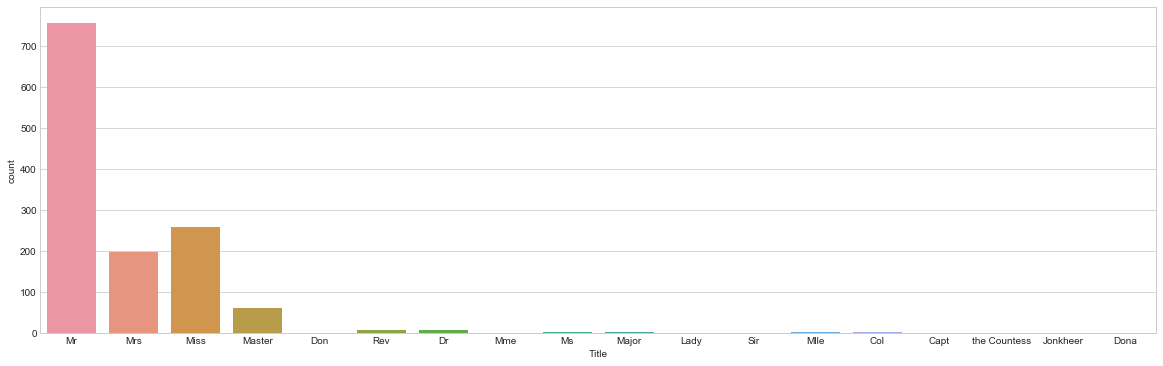

In [476]:
# check the values in 'Title' in graph
plt.figure(figsize = (20,6))
sns.countplot(data = full,x = 'Title')

In [477]:
# get the unique titles from the dataset
full.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

From the graph above, we can see that there are 18 unique titles in the dataset, the most common one is "Mr".

We can create a map to group some of the titles together. 

In [478]:
# a map of more aggregated titles
Title_Dictionary = {
                    "Mr":           "Mr",
                    "Mrs":          "Mrs",
                    "Miss":         "Miss",
                    "Master":       "Master",
                    "Don":          "Royalty",
                    "Rev":          "Officer",
                    "Dr":           "Officer",
                    "Mme":          "Mrs",
                    "Ms":           "Mrs",
                    "Major":        "Officer",
                    "Lady":         "Royalty",
                    "Sir":          "Royalty",
                    "Mlle":         "Miss",
                    "Col":          "Officer",
                    "Capt":         "Officer", 
                    "the Countess": "Royalty",
                    "Jonkheer":     "Royalty",
                    "Dona":         "Royalty"
                    }


In [479]:
# map the title to full dataset 
full['Title'] = full.Title.map(Title_Dictionary)

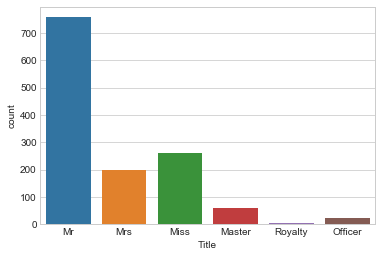

In [480]:
# see how title distributed
sns.countplot(x = 'Title', data=full)

Cool! Now we group 18 different titles to 6 titles. 

Convert titles to number

In [481]:
title = pd.get_dummies(full['Title'],drop_first=True)

In [482]:
# onces the columns changed to numeric values, we can drop the original and append the new ones
full.drop(['Title','Name'],axis = 1, inplace = True)

In [483]:
# Add the numerical title to full
full = pd.concat([full,title],axis = 1)

In [484]:
full.head()

,Age,Fare,Parch,PassengerId,SibSp,Survived,Ticket,male,Q,S,2,3,Miss,Mr,Mrs,Officer,Royalty
0,22.0,7.2500,0,1,1,0.0,A/5 21171,1,0,1,0,1,0,1,0,0,0
1,38.0,71.2833,0,2,1,1.0,PC 17599,0,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,3,0,1.0,STON/O2. 3101282,0,0,1,0,1,1,0,0,0,0
3,35.0,53.1000,0,4,1,1.0,113803,0,0,1,0,0,0,0,1,0,0
4,35.0,8.0500,0,5,0,0.0,373450,1,0,1,0,1,0,1,0,0,0


In [485]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
Age            1309 non-null float64
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
male           1309 non-null uint8
Q              1309 non-null uint8
S              1309 non-null uint8
2              1309 non-null uint8
3              1309 non-null uint8
Miss           1309 non-null uint8
Mr             1309 non-null uint8
Mrs            1309 non-null uint8
Officer        1309 non-null uint8
Royalty        1309 non-null uint8
dtypes: float64(3), int64(3), object(1), uint8(10)
memory usage: 84.4+ KB


For now, let's exclude Ticket.

In [486]:
full.drop(['Ticket'],axis = 1, inplace = True)

In [487]:
full.head()

,Age,Fare,Parch,PassengerId,SibSp,Survived,male,Q,S,2,3,Miss,Mr,Mrs,Officer,Royalty
0,22.0,7.2500,0,1,1,0.0,1,0,1,0,1,0,1,0,0,0
1,38.0,71.2833,0,2,1,1.0,0,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,3,0,1.0,0,0,1,0,1,1,0,0,0,0
3,35.0,53.1000,0,4,1,1.0,0,0,1,0,0,0,0,1,0,0
4,35.0,8.0500,0,5,0,0.0,1,0,1,0,1,0,1,0,0,0


** Create family size and category for family size ** 

We can combine Parch and SibSp together to create a family column

In [488]:
# create a new column called family size, including the passenger
full['FamilySize'] = full['Parch'] + full['SibSp'] + 1

In [489]:
full.head()

,Age,Fare,Parch,PassengerId,SibSp,Survived,male,Q,S,2,3,Miss,Mr,Mrs,Officer,Royalty,FamilySize
0,22.0,7.2500,0,1,1,0.0,1,0,1,0,1,0,1,0,0,0,2
1,38.0,71.2833,0,2,1,1.0,0,0,0,0,0,0,0,1,0,0,2
2,26.0,7.9250,0,3,0,1.0,0,0,1,0,1,1,0,0,0,0,1
3,35.0,53.1000,0,4,1,1.0,0,0,1,0,0,0,0,1,0,0,2
4,35.0,8.0500,0,5,0,0.0,1,0,1,0,1,0,1,0,0,0,1


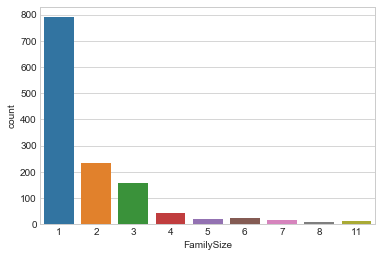

In [490]:
# check the distribution of family size
sns.countplot(x = 'FamilySize', data=full)

We can see from above that majority of the people were travel single. 

We can group the family size into three cateogries
1. Single (family size = 1)
2. Small (family size from 2 to 4)
3. Large (family size > 5)

In [491]:
full['Family_Single'] = full['FamilySize'].map(lambda s: 1 if s == 1 else 0)
full['Family_Small'] = full['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
full['Family_Large'] = full['FamilySize'].map(lambda s: 1 if s >=5 else 0)

In [492]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
Age              1309 non-null float64
Fare             1309 non-null float64
Parch            1309 non-null int64
PassengerId      1309 non-null int64
SibSp            1309 non-null int64
Survived         891 non-null float64
male             1309 non-null uint8
Q                1309 non-null uint8
S                1309 non-null uint8
2                1309 non-null uint8
3                1309 non-null uint8
Miss             1309 non-null uint8
Mr               1309 non-null uint8
Mrs              1309 non-null uint8
Officer          1309 non-null uint8
Royalty          1309 non-null uint8
FamilySize       1309 non-null int64
Family_Single    1309 non-null int64
Family_Small     1309 non-null int64
Family_Large     1309 non-null int64
dtypes: float64(3), int64(7), uint8(10)
memory usage: 115.1 KB


In [493]:
full.head()

,Age,Fare,Parch,PassengerId,SibSp,Survived,male,Q,S,2,3,Miss,Mr,Mrs,Officer,Royalty,FamilySize,Family_Single,Family_Small,Family_Large
0,22.0,7.2500,0,1,1,0.0,1,0,1,0,1,0,1,0,0,0,2,0,1,0
1,38.0,71.2833,0,2,1,1.0,0,0,0,0,0,0,0,1,0,0,2,0,1,0
2,26.0,7.9250,0,3,0,1.0,0,0,1,0,1,1,0,0,0,0,1,1,0,0
3,35.0,53.1000,0,4,1,1.0,0,0,1,0,0,0,0,1,0,0,2,0,1,0
4,35.0,8.0500,0,5,0,0.0,1,0,1,0,1,0,1,0,0,0,1,1,0,0


# Step 7: Assemble final datasets for modelling

Okay! Now we convert all categorical variables to numeric and fix missing values. We can start select the variables wer are interested in and put to our final datasets for modelling. 

we can removed PassengerId. PassengerId just a series of index. There is no information about survival from PassengerId


** Set the initial train_df, test_df and target for predicting **

In [494]:
# set the train set
train_df = full.drop(['Survived','PassengerId'],axis = 1)[:891]

In [495]:
train_df.head()

,Age,Fare,Parch,SibSp,male,Q,S,2,3,Miss,Mr,Mrs,Officer,Royalty,FamilySize,Family_Single,Family_Small,Family_Large
0,22.0,7.2500,0,1,1,0,1,0,1,0,1,0,0,0,2,0,1,0
1,38.0,71.2833,0,1,0,0,0,0,0,0,0,1,0,0,2,0,1,0
2,26.0,7.9250,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0
3,35.0,53.1000,0,1,0,0,1,0,0,0,0,1,0,0,2,0,1,0
4,35.0,8.0500,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0


In [496]:
# set the test set
test_df = full.drop(['Survived'],axis = 1)[891:]

In [497]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 19 columns):
Age              418 non-null float64
Fare             418 non-null float64
Parch            418 non-null int64
PassengerId      418 non-null int64
SibSp            418 non-null int64
male             418 non-null uint8
Q                418 non-null uint8
S                418 non-null uint8
2                418 non-null uint8
3                418 non-null uint8
Miss             418 non-null uint8
Mr               418 non-null uint8
Mrs              418 non-null uint8
Officer          418 non-null uint8
Royalty          418 non-null uint8
FamilySize       418 non-null int64
Family_Single    418 non-null int64
Family_Small     418 non-null int64
Family_Large     418 non-null int64
dtypes: float64(2), int64(7), uint8(10)
memory usage: 33.6 KB


In [498]:
test_df.head()

,Age,Fare,Parch,PassengerId,SibSp,male,Q,S,2,3,Miss,Mr,Mrs,Officer,Royalty,FamilySize,Family_Single,Family_Small,Family_Large
891,34.5,7.8292,0,892,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0
892,47.0,7.0000,0,893,1,0,0,1,0,1,0,0,1,0,0,2,0,1,0
893,62.0,9.6875,0,894,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0
894,27.0,8.6625,0,895,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0
895,22.0,12.2875,1,896,1,0,0,1,0,1,0,0,1,0,0,3,0,1,0


In [499]:
# set the target 
target = full['Survived'][:891]

** Which features are the important ones to include in the model? **

   We can use the feature selection for hints. Feature selection comes with many benefits: 

- It decreases redundancy among the data
- It speeds up the training process
- It reduces overfitting


Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.

In [500]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train_df, target)

Let's have a look at the importance of each feature.

In [501]:
features = pd.DataFrame()
features['feature'] = train_df.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

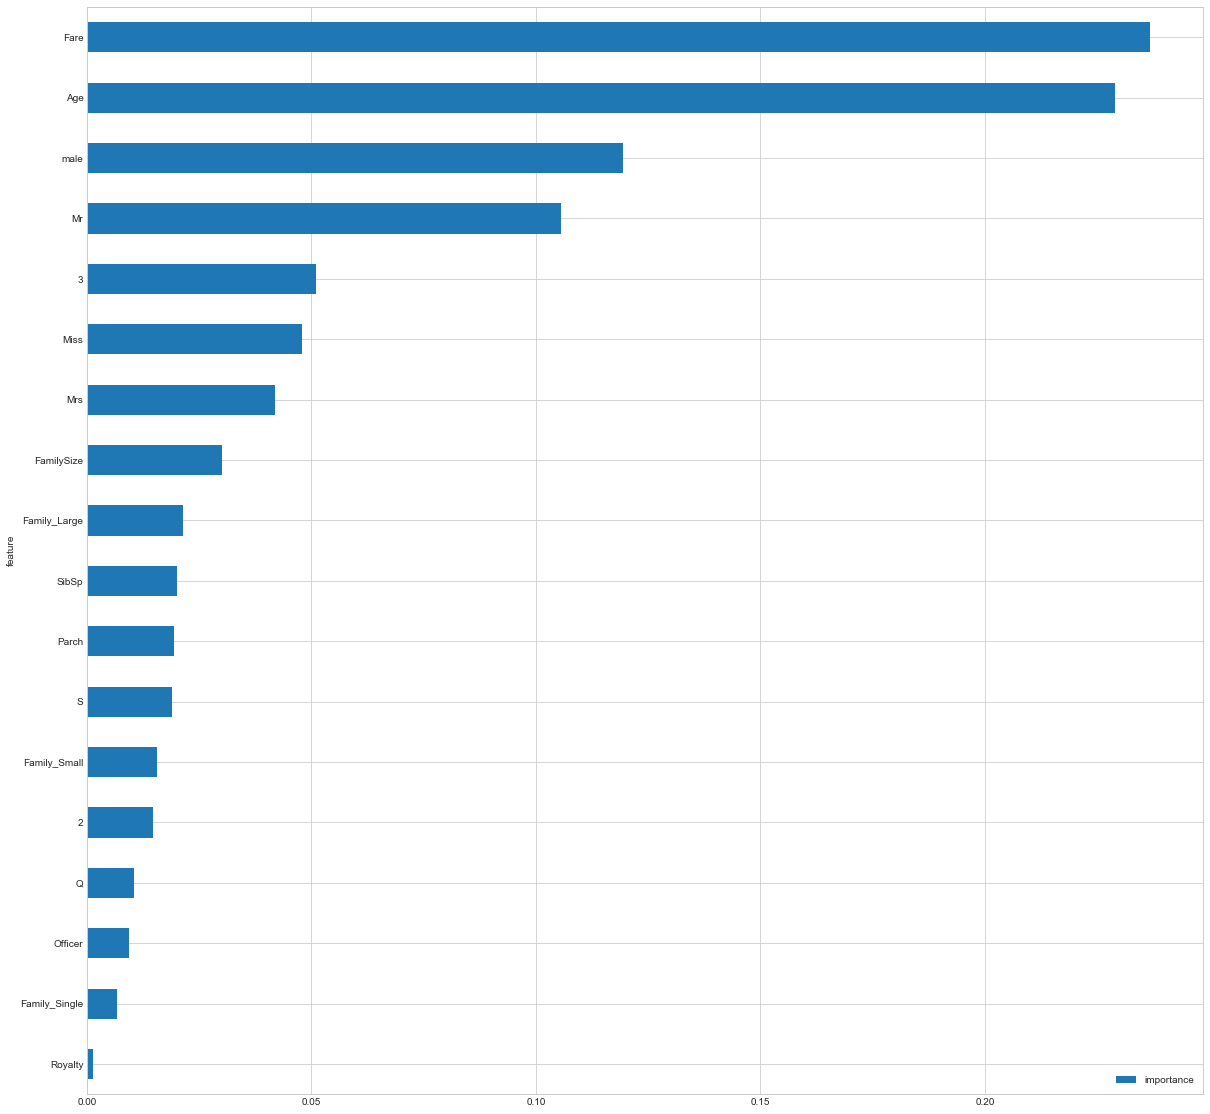

In [502]:
features.plot(kind='barh', figsize=(20, 20))

Looks like these features have some sort of impoartance. Let's just include them for now and start modelling.

# Step 8: Modelling
    
We will do:
1. Select the predictors and target
2. Split the train to training and test set
3. Build the model, predict the survival on test set
4. Evaluate the model 
5. Use the best model to apply to the test set

We select the predictos and target from Step 7. We will start in step 2 and forward in this section

** Train Test Split **

In [503]:
from sklearn.model_selection import train_test_split

In [504]:
X_train, X_test, y_train, y_test = train_test_split(train_df, 
                                                    target, test_size=0.30)

** Model 1: Logistic Regression ** 

In [505]:
# import the logistic regression 
from sklearn.linear_model import LogisticRegression

In [506]:
# create the object and fit the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [507]:
# predict the target - survival
log_pred = logmodel.predict(X_test)

In [508]:
# Evaluation 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,log_pred))

             precision    recall  f1-score   support

        0.0       0.84      0.87      0.86       170
        1.0       0.76      0.71      0.74        98

avg / total       0.81      0.81      0.81       268



In [509]:
print(confusion_matrix(y_test,log_pred))

[[148  22]
 [ 28  70]]


** Model 2: Decision Trees **

In [510]:
# import the library
from sklearn.tree import DecisionTreeClassifier

In [511]:
# create the object and fit the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [512]:
# prediction
dtree_pred = dtree.predict(X_test)

In [513]:
# Evaluation 
from sklearn.metrics import classification_report,confusion_matrix

In [514]:
print(classification_report(y_test,dtree_pred))

             precision    recall  f1-score   support

        0.0       0.83      0.84      0.84       170
        1.0       0.72      0.70      0.71        98

avg / total       0.79      0.79      0.79       268



In [515]:
print(confusion_matrix(y_test,dtree_pred))

[[143  27]
 [ 29  69]]


Compared Logistic Regression vs. Decision Trees, so far I see the precision score by using Logistic Regression is higher than Decision Trees. Logistic Regression won. We will move on to another model for a try. 

** Model 3: Random Forests ** 

In [516]:
# import the library
from sklearn.ensemble import RandomForestClassifier

In [517]:
# create the object and fit the data
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [518]:
# prediction 
rfc_pred = rfc.predict(X_test)

In [519]:
# evaluation 
from sklearn.metrics import classification_report,confusion_matrix

In [520]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

        0.0       0.84      0.88      0.86       170
        1.0       0.78      0.70      0.74        98

avg / total       0.82      0.82      0.82       268



In [521]:
print(confusion_matrix(y_test,rfc_pred))

[[150  20]
 [ 29  69]]


** Model 4: Support Vector Machines **

In [522]:
# import library
from sklearn.svm import SVC

In [523]:
# create an object and fit the model 
svc_model =SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [524]:
# prediction 
svc_pred = svc_model.predict(X_test)

In [525]:
# evaluation 
from sklearn.metrics import classification_report,confusion_matrix

In [526]:
print(classification_report(y_test,svc_pred))

             precision    recall  f1-score   support

        0.0       0.79      0.82      0.80       170
        1.0       0.66      0.62      0.64        98

avg / total       0.74      0.75      0.74       268



In [527]:
print(confusion_matrix(y_test,svc_pred))

[[139  31]
 [ 37  61]]


Support Vector Classifier is not as good as logistic regression 

** Model 5: Gradient Boosting Classifier ** 

In [528]:
# import library
from sklearn.ensemble import GradientBoostingClassifier

In [529]:
# create the object and fit the model
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [530]:
# prediction 
gbc_pred = gbc_model.predict(X_test)

In [531]:
# evaluation 
from sklearn.metrics import classification_report,confusion_matrix

In [532]:
print(classification_report(y_test,gbc_pred))

             precision    recall  f1-score   support

        0.0       0.86      0.91      0.88       170
        1.0       0.82      0.73      0.77        98

avg / total       0.84      0.84      0.84       268



In [533]:
print(confusion_matrix(y_test,gbc_pred))

[[154  16]
 [ 26  72]]


So far, I think Gradient Boosting Classifier has a higher score compared to logistic regression 

** Model 6: K-nearest neighbors **

In [534]:
# import the library
from sklearn.neighbors import KNeighborsClassifier

In [535]:
# create the object the fit model 
KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [536]:
# prediction 
KNN_pred = KNN_model.predict(X_test)

In [537]:
# evaluation 
from sklearn.metrics import classification_report,confusion_matrix

In [538]:
print(classification_report(y_test,KNN_pred))

             precision    recall  f1-score   support

        0.0       0.80      0.85      0.83       170
        1.0       0.71      0.64      0.67        98

avg / total       0.77      0.77      0.77       268



In [539]:
print(confusion_matrix(y_test,KNN_pred))

[[144  26]
 [ 35  63]]


Looks like Gradient Boosting Classifier is better than KNN

** Model 7: Gaussian Naive Bayes **

In [540]:
# import the library
from sklearn.naive_bayes import GaussianNB

In [541]:
# create the object the fit model 
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB(priors=None)

In [542]:
# prediction
gnb_pred = gnb_model.predict(X_test)

In [543]:
# evaluation 
from sklearn.metrics import classification_report,confusion_matrix

In [544]:
print(classification_report(y_test,gnb_pred))

             precision    recall  f1-score   support

        0.0       0.80      0.89      0.84       170
        1.0       0.76      0.62      0.69        98

avg / total       0.79      0.79      0.79       268



In [545]:
print(confusion_matrix(y_test,gnb_pred))

[[151  19]
 [ 37  61]]


Still Gradient Boosting Classifier is better

# Step 9: Select the final model to use for the test dataset and submit competition

Use Gradient Boosting Classifier

In [548]:
# we will use the Logistic Regression for submission

log_predictions = logmodel.predict(test_df.drop(['PassengerId'],axis=1))

my_submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": log_predictions
    })

In [549]:
# check the shape
my_submission.shape

,PassengerId,Survived
891,892,0.0
892,893,1.0
893,894,0.0
894,895,0.0
895,896,1.0


In [ ]:
# take a look at the file 
my_submission.head()

In [ ]:
# export the submission file
my_submission.to_csv('logistric_regression_submission.csv', index = False)